## D212 - Data Mining II - PA3

### Background Info:

**One of the most critical factors in patient relationship management that directly affects a hospital’s long-term cost effectiveness is understanding its patients and the conditions leading to hospital admissions. When a hospital can better understand its patients’ characteristics, it is better able to target treatment to patients, resulting in more effective cost of care for the hospital in the long term.**

**You are an analyst for a hospital that wants to better understand the characteristics of its patients. You have been asked to perform a market basket analysis to analyze patient data to identify key associations of your patients, ultimately allowing better business and strategic decision-making for the hospital.**

**_Question: From information about previous patients who were readmitted, can we ascertain the probability of certain medications (consequents) given a medication (antecedent) for our patients?_**

### Import Libraries

In [152]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data From medical_clean.csv

In [153]:
# File Open Dialog
#from tkinter.filedialog import askopenfilename
#df = pd.read_csv(askopenfilename())

In [154]:
# load data file
df = pd.read_csv('./medical_market_basket.csv')
# quick test the data is present and see the shape
df.head(5)

Presc01            Presc02                    Presc03       Presc04  \
0         NaN                NaN                        NaN           NaN   
1  amlodipine  albuterol aerosol                allopurinol  pantoprazole   
2         NaN                NaN                        NaN           NaN   
3  citalopram            benicar  amphetamine salt combo xr           NaN   
4         NaN                NaN                        NaN           NaN   

     Presc05     Presc06     Presc07      Presc08     Presc09      Presc10  \
0        NaN         NaN         NaN          NaN         NaN          NaN   
1  lorazepam  omeprazole  mometasone  fluconozole  gabapentin  pravastatin   
2        NaN         NaN         NaN          NaN         NaN          NaN   
3        NaN         NaN         NaN          NaN         NaN          NaN   
4        NaN         NaN         NaN          NaN         NaN          NaN   

  Presc11   Presc12                  Presc13           Presc14  Presc15  \
0     NaN       NaN                      NaN               NaN      NaN   
1  cialis  losartan  metoprolol succinate XL  sulfamethoxazole  abilify   
2     NaN       NaN                      NaN               NaN      NaN   
3     NaN       NaN                      NaN               NaN      NaN   
4     NaN       NaN                      NaN               NaN      NaN   

          Presc16        Presc17       Presc18       Presc19    Presc20  
0             NaN            NaN           NaN           NaN        NaN  
1  spironolactone  albuterol HFA  levofloxacin  promethazine  glipizide  
2             NaN            NaN           NaN           NaN        NaN  
3             NaN            NaN           NaN           NaN        NaN  
4             NaN            NaN           NaN           NaN        NaN

---
### Exploratory Data Analysis
---

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


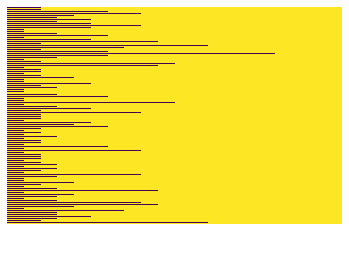

In [156]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

### Remove Empty Rows

In [157]:
# https://www.adamsmith.haus/python/answers/how-to-drop-a-list-of-rows-from-a-pandas-dataframe-by-index-in-python
is_empty = df.index[df.isna().all(axis=1)].tolist()
#is_empty
df.drop(is_empty, inplace=True)

df.head(2)

Presc01            Presc02                    Presc03       Presc04  \
1  amlodipine  albuterol aerosol                allopurinol  pantoprazole   
3  citalopram            benicar  amphetamine salt combo xr           NaN   

     Presc05     Presc06     Presc07      Presc08     Presc09      Presc10  \
1  lorazepam  omeprazole  mometasone  fluconozole  gabapentin  pravastatin   
3        NaN         NaN         NaN          NaN         NaN          NaN   

  Presc11   Presc12                  Presc13           Presc14  Presc15  \
1  cialis  losartan  metoprolol succinate XL  sulfamethoxazole  abilify   
3     NaN       NaN                      NaN               NaN      NaN   

          Presc16        Presc17       Presc18       Presc19    Presc20  
1  spironolactone  albuterol HFA  levofloxacin  promethazine  glipizide  
3             NaN            NaN           NaN           NaN        NaN

In [158]:
df.shape

(7501, 20)

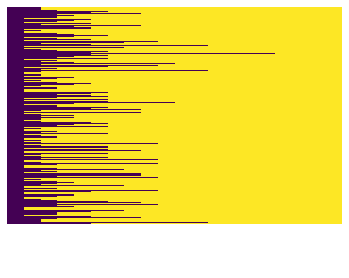

In [159]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

## Preparing & Transforming Data

In [160]:
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5aefcf2b-73cd-41f5-b4d3-aea0011efd05

trans = []
for i in range(0,7501):
    trans.append([str(df.values[i,j]) for j in range(0,20)])
    
# Transform list of lists into Numpy array
TE = TransactionEncoder()
array = TE.fit(trans).transform(trans)

In [161]:
# Create/Build df for Cleaning
cleaned_df = pd.DataFrame(array, columns = TE.columns_)
cleaned_df

Duloxetine  Premarin    Yaz  abilify  acetaminophen  actonel  \
0          False     False  False     True          False    False   
1          False     False  False    False          False    False   
2          False     False  False    False          False    False   
3          False     False  False    False          False    False   
4          False     False  False     True          False    False   
...          ...       ...    ...      ...            ...      ...   
7496       False     False  False    False          False    False   
7497       False     False  False    False          False    False   
7498       False     False  False    False          False    False   
7499       False     False  False    False          False    False   
7500       False     False  False    False          False    False   

      albuterol HFA  albuterol aerosol  alendronate  allopurinol  ...  \
0              True               True        False         True  ...   
1             False              False        False        False  ...   
2             False              False        False        False  ...   
3             False              False        False         True  ...   
4             False              False        False        False  ...   
...             ...                ...          ...          ...  ...   
7496          False              False        False        False  ...   
7497          False              False        False        False  ...   
7498          False              False        False        False  ...   
7499          False              False        False        False  ...   
7500          False              False        False        False  ...   

      trazodone HCI  triamcinolone Ace topical  triamterene  trimethoprim DS  \
0             False                      False        False            False   
1             False                      False        False            False   
2             False                      False        False            False   
3             False                      False        False            False   
4             False                      False        False            False   
...             ...                        ...          ...              ...   
7496          False                      False        False            False   
7497          False                      False        False            False   
7498          False                      False        False            False   
7499          False                      False        False            False   
7500          False                      False        False            False   

      valaciclovir  valsartan  venlafaxine XR  verapamil SR  viagra  zolpidem  
0            False      False           False         False   False     False  
1            False      False           False         False   False     False  
2            False      False           False         False   False     False  
3            False      False           False         False   False     False  
4            False      False           False         False   False     False  
...            ...        ...             ...           ...     ...       ...  
7496         False      False           False         False   False     False  
7497         False      False           False         False   False     False  
7498         False      False           False         False   False     False  
7499         False      False           False         False   False     False  
7500         False      False           False         False   False     False  

[7501 rows x 120 columns]

In [162]:
np.where(pd.isnull(df))

(array([   1,    1,    1, ..., 7500, 7500, 7500]),
 array([ 3,  4,  5, ..., 17, 18, 19]))

### Any Rows Missing Values?

In [163]:
cleaned_df.isnull().all(axis=1).any()

False

### Any Columns Missing Values?

In [164]:
cleaned_df.loc[:, cleaned_df.isnull().any()]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[7501 rows x 0 columns]

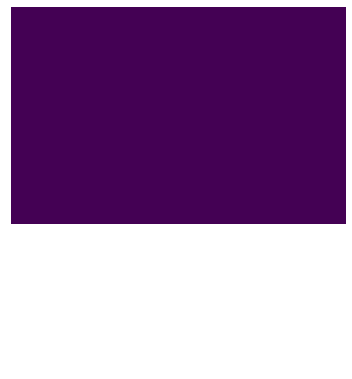

In [165]:
sns.heatmap(cleaned_df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [166]:
print(cleaned_df.dtypes)

Duloxetine        bool
Premarin          bool
Yaz               bool
abilify           bool
acetaminophen     bool
                  ... 
valsartan         bool
venlafaxine XR    bool
verapamil SR      bool
viagra            bool
zolpidem          bool
Length: 120, dtype: object


### Look for Empty Column

In [167]:
for col in cleaned_df.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

### Remove Empty Column

In [168]:
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5aefcf2b-73cd-41f5-b4d3-aea0011efd05
# drop empty column
cleaned_df = cleaned_df.drop(['nan'], axis=1)

In [169]:
# Shape
print("Shape: " + str(cleaned_df.shape))
print("---------"*5)

#Verify
for col in cleaned_df.columns:
    print(col)

Shape: (7501, 119)
---------------------------------------------
Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyrox

### Export Cleaned Data

In [170]:
cleaned_df.to_csv('cleaned_df.csv', index=False)
cleaned_df.shape

(7501, 119)

### List Popular Meds

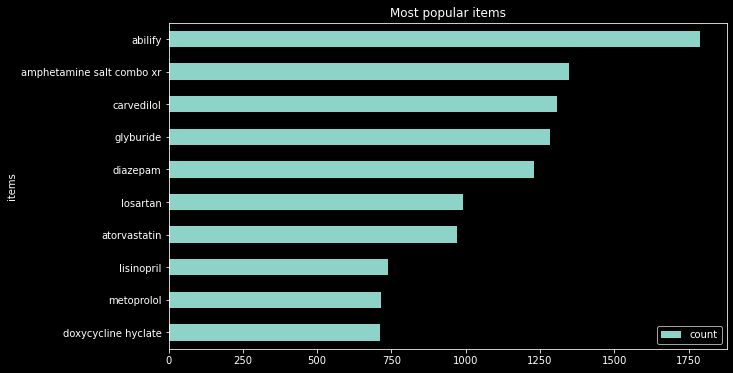

In [171]:
# https://sarakmair.medium.com/market-basket-analysis-8dc699b7e27
#most popular Meds
count = cleaned_df.loc[:,:].sum()
freq_pharm = count.sort_values(ascending=False).head(10)
freq_pharm = freq_pharm.to_frame()
freq_pharm = freq_pharm.reset_index()
freq_pharm = freq_pharm.rename(columns = {'index': 'items',0: 'count'})

#Data Visualization
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('dark_background')
ax = freq_pharm.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

In [172]:
print("Frequest Transactions: " + str(freq_pharm))

Frequest Transactions:                        items  count
0                    abilify   1788
1  amphetamine salt combo xr   1348
2                 carvedilol   1306
3                  glyburide   1282
4                   diazepam   1229
5                   losartan    991
6               atorvastatin    972
7                 lisinopril    737
8                 metoprolol    715
9        doxycycline hyclate    713


### Apply Apriori Algorithm

In [173]:
# Apply the A Priori Algorithm
a_rules = apriori(cleaned_df, min_support = 0.02, use_colnames=True)
a_rules.head()

support             itemsets
0  0.046794           (Premarin)
1  0.238368            (abilify)
2  0.020397  (albuterol aerosol)
3  0.033329        (allopurinol)
4  0.079323         (alprazolam)

In [174]:
a_rules_results = list(a_rules)
print(a_rules_results)

['support', 'itemsets']


### Heatmap Only Showing Support Above 0.05

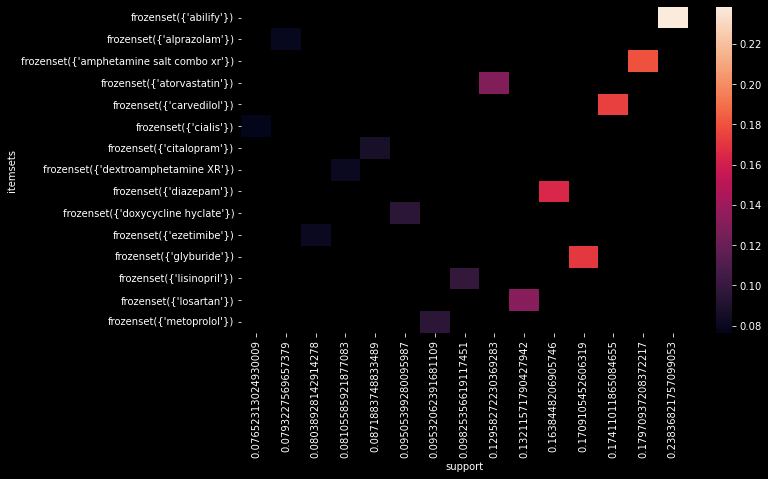

In [186]:
support_table = a_rules[a_rules['support'] > 0.075].pivot(index='itemsets', columns='support', values='support')
sns.heatmap(support_table);

### Association Rules

In [176]:
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5aefcf2b-73cd-41f5-b4d3-aea0011efd05
ass_r = association_rules(a_rules, metric='lift', min_threshold=1)
ass_r.sort_values(by=['antecedents','consequents'], ascending=True).head(10)

antecedents                  consequents  antecedent support  \
0   (amlodipine)                    (abilify)            0.071457   
36  (amlodipine)                 (carvedilol)            0.071457   
34    (naproxen)                    (abilify)            0.058526   
32  (metoprolol)                    (abilify)            0.095321   
88  (metoprolol)                   (diazepam)            0.095321   
78  (metoprolol)                 (carvedilol)            0.095321   
65  (metoprolol)               (atorvastatin)            0.095321   
54  (metoprolol)  (amphetamine salt combo xr)            0.095321   
31   (metformin)                    (abilify)            0.050527   
28  (lisinopril)                    (abilify)            0.098254   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.238368  0.023597    0.330224  1.385352  0.006564    1.137144  
36            0.174110  0.021197    0.296642  1.703760  0.008756    1.174209  
34            0.238368  0.020131    0.343964  1.442993  0.006180    1.160960  
32            0.238368  0.035729    0.374825  1.572463  0.013007    1.218270  
88            0.163845  0.022930    0.240559  1.468215  0.007312    1.101015  
78            0.174110  0.027863    0.292308  1.678867  0.011267    1.167018  
65            0.129583  0.023597    0.247552  1.910382  0.011245    1.156781  
54            0.179709  0.021730    0.227972  1.268559  0.004600    1.062514  
31            0.238368  0.023064    0.456464  1.914955  0.011020    1.401255  
28            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401

In [177]:
ass_r.shape

(94, 9)

## Top 3 Rules by Support

In [178]:
# Support: frequency value for a medication within our dataset.

ass_r.sort_values(by=['support'],ascending=False).head(3)

antecedents   consequents  antecedent support  consequent support  \
8   (carvedilol)     (abilify)            0.174110            0.238368   
9      (abilify)  (carvedilol)            0.238368            0.174110   
19     (abilify)    (diazepam)            0.238368            0.163845   

     support  confidence      lift  leverage  conviction  
8   0.059725    0.343032  1.439085  0.018223    1.159314  
9   0.059725    0.250559  1.439085  0.018223    1.102008  
19  0.052660    0.220917  1.348332  0.013604    1.073256

## Top 3 Rules by Confidence

In [179]:
# Confidence: measures the association value if another medication is prescribed.

ass_r.sort_values(by=['confidence'],ascending=False).head(3)

antecedents consequents  antecedent support  consequent support  \
31   (metformin)   (abilify)            0.050527            0.238368   
25   (glipizide)   (abilify)            0.065858            0.238368   
28  (lisinopril)   (abilify)            0.098254            0.238368   

     support  confidence      lift  leverage  conviction  
31  0.023064    0.456464  1.914955  0.011020    1.401255  
25  0.027596    0.419028  1.757904  0.011898    1.310962  
28  0.040928    0.416554  1.747522  0.017507    1.305401

## Top 3 Rules by Lift

In [180]:
# Lift: measures the level of importance for the specific rule.

ass_r.sort_values(by=['lift'],ascending=False).head(3)

antecedents   consequents  antecedent support  consequent support  \
75  (carvedilol)  (lisinopril)            0.174110            0.098254   
74  (lisinopril)  (carvedilol)            0.098254            0.174110   
73   (glipizide)  (carvedilol)            0.065858            0.174110   

     support  confidence      lift  leverage  conviction  
75  0.039195    0.225115  2.291162  0.022088    1.163716  
74  0.039195    0.398915  2.291162  0.022088    1.373997  
73  0.022930    0.348178  1.999758  0.011464    1.267048

### Pruning to Keep Rules 

In [181]:
pru_r_s=ass_r[ass_r['support'] > 0.03]
# ex: only 94 meds (pru_r) are left. means only x rows above y% range
print("only {} meds (pru_r_s) are left.".format(len(pru_r_s)))

only 32 meds (pru_r_s) are left.


In [182]:
pru_r_c=pru_r_s[pru_r_s['confidence'] > 0.2]
# ex: only 94 meds (pru_r) are left. means only x rows above y% range
print("Using the above support fiter and this confidence filter, only {} meds (pru_r_c) are left.".format(len(pru_r_c)))

Using the above support fiter and this confidence filter, only 26 meds (pru_r_c) are left.


In [183]:
pru_r_l=pru_r_c[pru_r_c['lift'] > 1.5]
# ex: only 94 meds (pru_r) are left. means only x rows above y% range
print("Using all three filters, only {} meds (pru_r_l) are left.".format(len(pru_r_l)))

Using all three filters, only 9 meds (pru_r_l) are left.


In [184]:
# Final List after Pruning
final_list = pru_r_l
final_list.head(10)

antecedents     consequents  antecedent support  consequent support  \
6   (atorvastatin)       (abilify)            0.129583            0.238368   
7        (abilify)  (atorvastatin)            0.238368            0.129583   
28    (lisinopril)       (abilify)            0.098254            0.238368   
32    (metoprolol)       (abilify)            0.095321            0.238368   
56  (atorvastatin)    (carvedilol)            0.129583            0.174110   
57    (carvedilol)  (atorvastatin)            0.174110            0.129583   
58  (atorvastatin)      (diazepam)            0.129583            0.163845   
74    (lisinopril)    (carvedilol)            0.098254            0.174110   
75    (carvedilol)    (lisinopril)            0.174110            0.098254   

     support  confidence      lift  leverage  conviction  
6   0.047994    0.370370  1.553774  0.017105    1.209650  
7   0.047994    0.201342  1.553774  0.017105    1.089850  
28  0.040928    0.416554  1.747522  0.017507    1.305401  
32  0.035729    0.374825  1.572463  0.013007    1.218270  
56  0.035462    0.273663  1.571779  0.012900    1.137061  
57  0.035462    0.203675  1.571779  0.012900    1.093043  
58  0.032129    0.247942  1.513276  0.010898    1.111823  
74  0.039195    0.398915  2.291162  0.022088    1.373997  
75  0.039195    0.225115  2.291162  0.022088    1.163716

In [185]:
final_list.to_csv('final_list.csv', index=False)
final_list.shape

(9, 9)